# Agentic RAG 시스템 - 모듈화된 버전

이 노트북은 분리된 모듈들(`states.py`, `tools.py`, `agents.py`, `nodes.py`, `graph.py`)을 사용하여 Agentic RAG 시스템을 실행합니다.

## 모듈 구조
- **`states.py`**: 상태 정의 (AgentState, RouteResponse)
- **`tools.py`**: 도구 생성 함수들
- **`agents.py`**: 에이전트 생성 함수들  
- **`nodes.py`**: 노드 실행 함수들
- **`graph.py`**: 그래프 생성 및 워크플로우 (Supervisor 포함)


In [12]:
# 환경 설정 및 의존성 로드
from dotenv import load_dotenv
load_dotenv()

print("✅ 환경 변수 로드 완료")


✅ 환경 변수 로드 완료


In [13]:
# Retriever 설정
from retriever import QdrantRetrieverFactory

# QdrantRetrieverFactory 인스턴스 생성
qs = QdrantRetrieverFactory()

# Retriever 생성 (SPRI AI Brief 컬렉션 사용)
retriever = qs.retriever(
    collection_name="RAG_Example(RAG_strategies)", 
    fetch_k=3
)

print("✅ Retriever 설정 완료")
print(f"📚 컬렉션: RAG_Example(RAG_strategies)")
print(f"🔍 검색 문서 수: 3개")


✅ Retriever 설정 완료
📚 컬렉션: RAG_Example(RAG_strategies)
🔍 검색 문서 수: 3개


In [14]:
# Retriever 테스트
print("🔍 Retriever 테스트 중...")
test_result = retriever.invoke("미드저니")
print(f"📄 검색 결과: {len(test_result)}개 문서")
print("✅ Retriever 정상 작동 확인")


🔍 Retriever 테스트 중...
📄 검색 결과: 3개 문서
✅ Retriever 정상 작동 확인


In [15]:
# Agentic RAG 그래프 생성
from graph import create_agentic_rag_graph
from langchain_core.messages import HumanMessage
from langchain_core.runnables import RunnableConfig

# 그래프 생성 (메모리 포함)
graph = create_agentic_rag_graph(retriever, use_memory=True)

print("✅ Agentic RAG 그래프 생성 완료")
print("🤖 포함된 에이전트:")
print("  - Retriever: SPRI 문서 검색")
print("  - Researcher: 웹 검색 (TavilySearch)")
print("  - Coder: 차트 생성 (Python REPL)")
print("  - General LLM: 일반 대화")
print("  - Supervisor: 에이전트 관리")


✅ Agentic RAG 그래프 생성 완료
🤖 포함된 에이전트:
  - Retriever: SPRI 문서 검색
  - Researcher: 웹 검색 (TavilySearch)
  - Coder: 차트 생성 (Python REPL)
  - General LLM: 일반 대화
  - Supervisor: 에이전트 관리


In [16]:
# 메모리 없는 그래프도 생성 (각 질문이 독립적)
from graph import create_agentic_rag_graph_no_memory

graph_no_memory = create_agentic_rag_graph_no_memory(retriever)

print("✅ 메모리 없는 그래프도 생성 완료")
print("💡 메모리 없는 그래프는 각 질문이 완전히 독립적으로 처리됩니다.")


✅ 메모리 없는 그래프도 생성 완료
💡 메모리 없는 그래프는 각 질문이 완전히 독립적으로 처리됩니다.


## 테스트 실행

이제 다양한 질문으로 그래프를 테스트해보겠습니다.


In [25]:
# 테스트 1: 일반 대화 (General LLM)
print("=" * 60)
print("🧪 테스트 1: 일반 대화")
print("=" * 60)

config = RunnableConfig(recursion_limit=10, configurable={"thread_id": "test1"})

inputs = {
    "messages": [HumanMessage(content="안녕하세요!")]
}

result = graph.invoke(inputs, config)
print("✅ 테스트 1 완료")
print(result)


🧪 테스트 1: 일반 대화
✅ 테스트 1 완료
{'messages': [HumanMessage(content='안녕하세요!', additional_kwargs={}, response_metadata={}, id='72e0caa4-be07-4f2f-8117-05c2c4e2a9ac'), HumanMessage(content='안녕하세요! 어떻게 도와드릴까요?', additional_kwargs={}, response_metadata={}, name='general', id='6f4d3ff4-deac-491a-b073-38464d9fafa3'), HumanMessage(content='안녕하세요! 무엇을 도와드릴까요? 궁금한 점이나 필요한 정보가 있으면 말씀해 주세요.', additional_kwargs={}, response_metadata={}, name='general', id='e3cae2c9-a743-464e-8c2c-7dbe7e1d1005'), HumanMessage(content='안녕하세요!', additional_kwargs={}, response_metadata={}, id='2a785120-f2a6-4484-8f67-8381e866201b'), HumanMessage(content='안녕하세요! 반갑습니다. 무엇을 도와드릴까요?', additional_kwargs={}, response_metadata={}, name='general', id='535cc235-9f50-45d6-a35b-b10929c62b47')], 'next': 'FINISH'}


In [24]:
# 테스트 2: SPRI 문서 검색 (Retriever)
print("=" * 60)
print("🧪 테스트 2: SPRI 문서 검색")
print("=" * 60)

config = RunnableConfig(recursion_limit=10, configurable={"thread_id": "test2"})

inputs = {
    "messages": [HumanMessage(content="미드저니 신버전은? SPRI에서 찾아줘")]
}

result = graph.invoke(inputs, config)
print("✅ 테스트 2 완료")
print(result)


🧪 테스트 2: SPRI 문서 검색
✅ 테스트 2 완료
{'messages': [HumanMessage(content='미드저니 신버전은? SPRI에서 찾아줘', additional_kwargs={}, response_metadata={}, id='20d650cb-4b0c-4421-8d31-34c08b082591'), AIMessage(content="미드저니 신버전은 2025년 6월 19일에 비디오 생성 모델 'V1'을 출시했습니다. 이 모델은 미드저니 플랫폼에서 제작된 이미지나 외부 이미지를 바탕으로 동영상을 생성하며, '자동' 설정 시에는 모션 프롬프트가 자동으로 생성되고, '수동' 설정을 선택하면 사용자가 지시에 따라 사물이나 장면의 움직임을 만들 수 있습니다. 사용자는 '하이 모션(High Motion)'과 '로우 모션(Low Motion)' 중에서 움직임 강도를 선택할 수 있습니다. V1은 1회 작업으로 5초 길이의 동영상 4개를 제작하며, 생성된 동영상은 최대 4회까지 4초씩 영상 길이를 확장할 수 있습니다.\n\n또한, 미드저니는 2026년에 3D 모델과 실시간 처리 모델을 출시하고, 이를 하나로 통합하는 것을 목표로 하고 있습니다.\n\n출처: SPRI AI Brief 8월호 산업동향 (2025)", additional_kwargs={}, response_metadata={}, name='retriever', id='992d8ee7-2422-4f1c-a75b-38f94645400e'), HumanMessage(content="미드저니 신버전은 2025년 6월 19일에 비디오 생성 모델 'V1'을 출시했습니다. 이 모델은 이미지나 외부 이미지를 바탕으로 동영상을 생성하며, 자동 또는 수동 모션 설정을 통해 움직임을 만들 수 있습니다. 사용자는 움직임 강도를 선택할 수 있고, 5초 길이의 동영상 4개를 제작할 수 있으며, 최대 4회까지 4초씩 영상 길이를 확장할 수 있습니다. 또한, 2026년에는 3D 모델과 실시간 처리 모델을 출시하고 이를 통합

In [23]:
# 테스트 3: 웹 검색 (Researcher)
print("=" * 60)
print("🧪 테스트 3: 웹 검색")
print("=" * 60)

config = RunnableConfig(recursion_limit=10, configurable={"thread_id": "test3"})

inputs = {
    "messages": [HumanMessage(content="2024년 AI 트렌드는? 최신 정보를 찾아줘")]
}

result = graph.invoke(inputs, config)
print("✅ 테스트 3 완료")
print(result)


🧪 테스트 3: 웹 검색
✅ 테스트 3 완료
{'messages': [HumanMessage(content='2024년 AI 트렌드는? 최신 정보를 찾아줘', additional_kwargs={}, response_metadata={}, id='adb93722-98a4-4a2f-8842-1c471987c16c'), AIMessage(content="2024년 AI 트렌드에 대한 최신 정보는 다음과 같습니다:\n\n1. 일본 방위성은 2025년 6월 6일 무기 연구개발 시 AI 활용 방침을 발표했습니다. 이 방침은 2024년 7월 발표한 'AI 활용을 위한 기본 방침'을 토대로 무기 관련 연구개발에서 AI 위험을 관리하고 이점을 극대화하는 프레임워크를 제공합니다. 주요 적용 분야는 목표 탐지·식별, 정보 수집·분석, 지휘통제, 후방 지원, 무인기, 사이버 안보, 사무 처리 등 7개 핵심 분야입니다. 또한, 국제인도법 원칙에 따라 AI 무기 개발 시 국제법과 국내법 준수, 인간의 참여와 책임을 요구합니다.\n\n2. AI에 노출된 직업의 일자리 수는 전 세계적으로 증가 추세입니다. 특히 AI에 더 많이 노출된 직업(예: 교육 전문가, 법률 전문가)의 일자리 수는 2019~2024년 사이 38% 증가했으나, AI에 덜 노출된 직업(예: 운전사)의 증가율(65%)보다는 낮습니다.\n\n3. AI에 가장 많이 노출된 직업(예: 재무 분석가)에서는 고용주가 요구하는 기술 변화가 AI에 덜 노출된 직업(예: 물리 치료사)보다 66% 더 빠르게 일어나고 있으며, 학위 요건은 감소하는 추세입니다. AI 증강형 일자리에서 학위 요구 비율은 2019년 66%에서 2024년 59%로, AI 자동화형 일자리에서는 53%에서 44%로 줄었습니다.\n\n이 정보는 SPRI AI Brief 2024년 7월호 산업동향 문서에서 발췌하였습니다.", additional_kwargs={}, response_metadata={}, name='retriever', id='ccdbbe01-d48e-4

🧪 테스트 4: 차트 생성


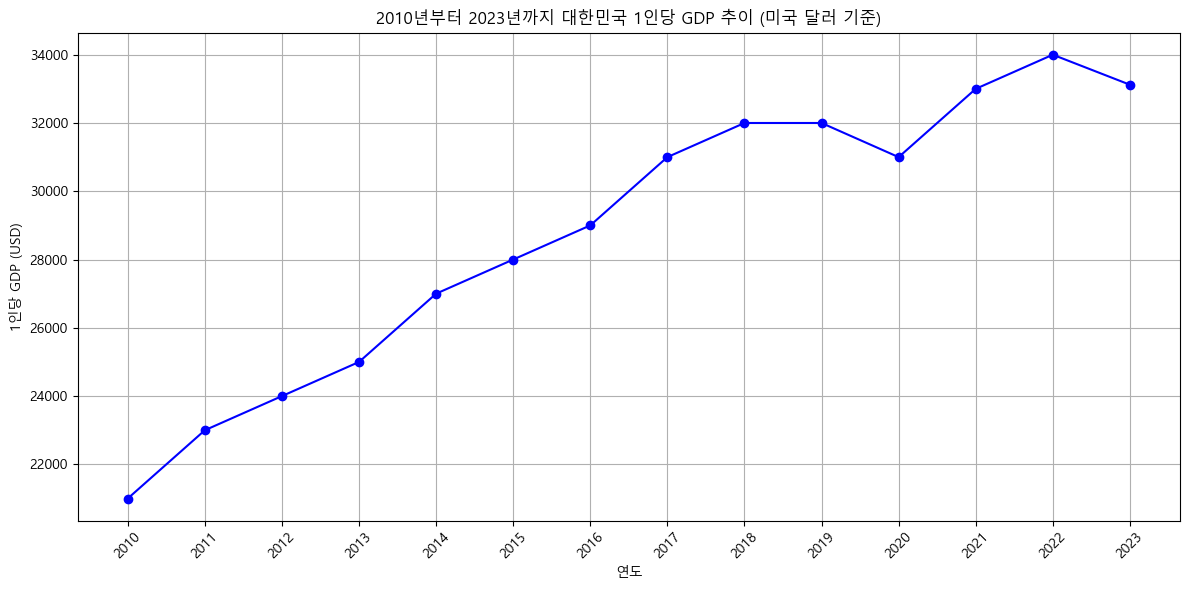

✅ 테스트 4 완료


In [20]:
# 테스트 4: 차트 생성 (Coder)
print("=" * 60)
print("🧪 테스트 4: 차트 생성")
print("=" * 60)

config = RunnableConfig(recursion_limit=10, configurable={"thread_id": "test4"})

inputs = {
    "messages": [HumanMessage(content="2010년부터 2024년까지 대한민국 1인당 GDP 추이를 그래프로 그려줘")]
}

result = graph.invoke(inputs, config)
print("✅ 테스트 4 완료")


## 스트리밍 테스트

실시간으로 그래프 실행 과정을 확인해보겠습니다.


In [21]:
# 스트리밍 테스트 (실시간 실행 과정 확인)
from langchain_teddynote.messages import stream_graph

print("=" * 60)
print("🌊 스트리밍 테스트")
print("=" * 60)

config = RunnableConfig(recursion_limit=10, configurable={"thread_id": "stream_test"})

inputs = {
    "messages": [HumanMessage(content="안녕? 어떻게 지내?")]
}

# 스트리밍으로 실행
stream_graph(graph, inputs, config)


🌊 스트리밍 테스트

🔄 Node: Supervisor 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
{"next":"General LLM"}
🔄 Node: agent 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
안녕! 나는 잘 지내고 있어. 너는 어떻게 지내? 도움이 필요하면 언제든 말해줘!
🔄 Node: General LLM 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
안녕! 나는 잘 지내고 있어. 너는 어떻게 지내? 도움이 필요하면 언제든 말해줘!
🔄 Node: Supervisor 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
{"next":"FINISH"}

## 메모리 없는 그래프 테스트

각 질문이 완전히 독립적으로 처리되는 메모리 없는 그래프를 테스트해보겠습니다.


## 사용자 정의 질문 테스트

원하는 질문을 입력해서 테스트해보세요!


In [26]:
# 사용자 정의 질문 테스트
# 아래 질문을 원하는 내용으로 변경해서 테스트해보세요!

user_question = "AI의 미래는 어떻게 될까요?"

print("=" * 60)
print("🎯 사용자 정의 질문 테스트")
print("=" * 60)
print(f"❓ 질문: {user_question}")
print("=" * 60)

config = RunnableConfig(recursion_limit=10, configurable={"thread_id": "user_test"})

inputs = {
    "messages": [HumanMessage(content=user_question)]
}

# 스트리밍으로 실행하여 실시간 과정 확인
stream_graph(graph, inputs, config)


🎯 사용자 정의 질문 테스트
❓ 질문: AI의 미래는 어떻게 될까요?

🔄 Node: Supervisor 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
{"next":"General LLM"}
🔄 Node: agent 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
AI의 미래는 매우 밝고 다방면에서 큰 변화를 가져올 것으로 예상됩니다. 몇 가지 주요 전망을 말씀드리자면:

1. **기술 발전 가속화**: AI 알고리즘과 하드웨어의 발전으로 AI의 성능과 효율성이 크게 향상될 것입니다. 더 정교하고 복잡한 문제를 해결할 수 있게 될 것입니다.

2. **산업 전반의 혁신**: 의료, 금융, 제조, 교육, 교통 등 다양한 산업에서 AI가 핵심 역할을 하며 업무 효율성과 품질을 높일 것입니다.

3. **개인화 서비스 확대**: AI는 개인의 취향과 필요에 맞춘 맞춤형 서비스 제공에 더욱 능숙해져, 사용자 경험이 크게 개선될 것입니다.

4. **윤리적 문제와 규제**: AI의 영향력이 커짐에 따라 개인정보 보호, 편향성, 책임 소재 등 윤리적 문제에 대한 논의와 규제가 강화될 것입니다.

5. **인간과 AI의 협업**: AI가 인간의 업무를 대체하기보다는 보완하고 협력하는 방향으로 발전하여, 새로운 형태의 일자리와 협업 모델이 등장할 것입니다.

6. **자율 시스템의 확산**: 자율주행차, 드론, 로봇 등 자율 시스템이 일상생활과 산업 현장에 널리 보급될 것입니다.

요약하면, AI는 앞으로도 계속 발전하며 우리 삶과 사회 전반에 깊은 영향을 미칠 것이며, 기술적 진보와 함께 윤리적, 사회적 고려도 중요해질 것입니다. 더 구체적인 분야나 관심사가 있으시면 말씀해 주세요!
🔄 Node: General LLM 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
AI의 미래는 매우 밝고 다방면에서 큰 변화를 가져올 것으로 예상됩

## 모듈 구조 요약

이제 분리된 모듈들을 사용하여 Agentic RAG 시스템을 성공적으로 실행했습니다!

### 📁 모듈 구조
- **`states.py`**: 상태 정의 (AgentState, RouteResponse, MEMBERS)
- **`tools.py`**: 도구 생성 (retriever_tool, python_repl_tool, tavily_search_tool)
- **`agents.py`**: 에이전트 생성 (retriever, research, coder, general agents)
- **`nodes.py`**: 노드 실행 함수들
- **`graph.py`**: 그래프 생성 및 워크플로우 (Supervisor 포함)

### 🎯 장점
- **모듈화**: 각 기능이 명확히 분리됨
- **재사용성**: 각 모듈을 독립적으로 사용 가능
- **유지보수**: 특정 기능 수정 시 해당 모듈만 수정
- **테스트**: 각 모듈을 독립적으로 테스트 가능
